<a href="https://www.kaggle.com/code/krishanand100/exploratory-data-analysis?scriptVersionId=125114203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv


In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
df = pd.read_csv("/kaggle/input/all-space-missions-from-1957/Space_Corrected.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# **Data Set Exploration**

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [5]:
df.shape

(4324, 9)

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company Name', 'Location', 'Datum',
       'Detail', 'Status Rocket', ' Rocket', 'Status Mission'],
      dtype='object')

# **Cleaning and Preparing Data for Analysis**

***(i)Column headers***

In [7]:
#splitting the datum column for relevant info
df['Month']=df['Datum'].str.split(' ', expand=True)[1]
df['Year']=df['Datum'].str.split(' ',expand=True)[3]
#splitting Loaction column to extract country name only 
df['Country']=df['Location'].str.split(', ').str[-1]
df.head(2)

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Month,Year,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Aug,2020,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Aug,2020,China


In [8]:
#Removing irrelevant columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1','Datum','Location'],axis=1,inplace=True)
df.head(2)

,Company Name,Detail,Status Rocket,Rocket,Status Mission,Month,Year,Country
0,SpaceX,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Aug,2020,USA
1,CASC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Aug,2020,China


In [9]:
#Renaming and Rearranging columns for better understanding
#Rocket has extra space: ' Rocket'
new_columns_dict={'Company Name':'Company','Detail':'Rocket Details','Status Rocket':'Rocket Status',' Rocket':'Cost of Mission','Status Mission':'Mission Status'}
df=df.rename(columns=new_columns_dict)
df=df[['Country','Company','Year','Month','Rocket Details','Rocket Status','Mission Status','Cost of Mission']]
df.head(2)

,Country,Company,Year,Month,Rocket Details,Rocket Status,Mission Status,Cost of Mission
0,USA,SpaceX,2020,Aug,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,50.0
1,China,CASC,2020,Aug,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,29.75


**(ii) Data types**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          4324 non-null   object
 1   Company          4324 non-null   object
 2   Year             4324 non-null   object
 3   Month            4324 non-null   object
 4   Rocket Details   4324 non-null   object
 5   Rocket Status    4324 non-null   object
 6   Mission Status   4324 non-null   object
 7   Cost of Mission  964 non-null    object
dtypes: object(8)
memory usage: 270.4+ KB


Year and Cost of Mission should be of numeric type

In [11]:
#converting Cost of Mission column to numeric
#df['Cost of Mission']=pd.to_numeric(df['Cost of Mission'])

In [12]:
#checking vlaue at 1916
df['Cost of Mission'].iloc[1916]

'5,000.0 '

In [13]:
#converting the value to numeric
df.at[1916,'Cost of Mission']=5000

In [14]:
#trying to convert again
#df['Cost of Mission']=pd.to_numeric(df['Cost of Mission'])

Seems there are many strings in Cost of Mission column. Trying to eliminate all at once

In [15]:
#removing special characters
df['Cost of Mission'] = df['Cost of Mission'].str.replace("'", "").str.replace(',','')


In [16]:
df['Cost of Mission']=pd.to_numeric(df['Cost of Mission'])
df['Year']=pd.to_numeric(df['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          4324 non-null   object 
 1   Company          4324 non-null   object 
 2   Year             4324 non-null   int64  
 3   Month            4324 non-null   object 
 4   Rocket Details   4324 non-null   object 
 5   Rocket Status    4324 non-null   object 
 6   Mission Status   4324 non-null   object 
 7   Cost of Mission  963 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 270.4+ KB


****(iii) Missing Values****

In [17]:
missing=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count'])

,count,%
Country,0,0.000000
Company,0,0.000000
Year,0,0.000000
Month,0,0.000000
Rocket Details,0,0.000000
Rocket Status,0,0.000000
Mission Status,0,0.000000
Cost of Mission,3361,77.728955


Cost of Mission has significant percentage of missing values. Filling the empty cells with mean of column isn't fruitful; but since much info not available: *filling the empty cells with mean*

In [18]:

df['Cost of Mission']=df['Cost of Mission'].fillna(df['Cost of Mission'].mean())
missing=pd.concat([pd.isnull(df).sum(),100*pd.isnull(df).mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count'])

,count,%
Country,0,0.0
Company,0,0.0
Year,0,0.0
Month,0,0.0
Rocket Details,0,0.0
Rocket Status,0,0.0
Mission Status,0,0.0
Cost of Mission,0,0.0


**(iv)Unique Values**

In [19]:
df.columns

Index(['Country', 'Company', 'Year', 'Month', 'Rocket Details',
       'Rocket Status', 'Mission Status', 'Cost of Mission'],
      dtype='object')

In [20]:
df['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

Replacing Non-country names to respective countries

In [21]:
#locate one of the raw 
df.loc[df['Country'].str.contains('Shahrud Missile Test Site',case=False)]

,Country,Company,Year,Month,Rocket Details,Rocket Status,Mission Status,Cost of Mission
35,Shahrud Missile Test Site,IRGC,2020,Apr,Qased | Noor 1,StatusActive,Success,148.759792


In [22]:
countries_dict = {
    "Shahrud Missile Test Site": "Iran",
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Pacific Missile Range Facility": 'USA',
    "Pacific Ocean":'Multi National',
    "Barents Sea": 'Russia',
    "Gran Canaria": 'USA'
}
df['Country']=df['Country'].replace(countries_dict)
df['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Iran', 'France', 'India', 'North Korea',
       'Multi National', 'South Korea', 'Brazil', 'Kenya', 'Australia'],
      dtype=object)

In [23]:
df['Company'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [24]:
company_dict={"Arm??e de l'Air":"Arme de l'Air"}
df["Company"]=df["Company"].replace(company_dict)
df["Company"].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA', "Arme de l'Air",
       'US Navy'], dtype=object)

In [25]:
df['Year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957])

In [26]:
df['Month'].unique()

array(['Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [27]:
df['Rocket Status'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [28]:
df['Mission Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [29]:
df['Cost of Mission'].unique()

array([  50.        ,   29.75      ,  148.75979232,   65.        ,
        145.        ,   64.68      ,   48.5       ,   90.        ,
         46.        ,   28.3       ,   29.15      ,    7.5       ,
         30.8       ,    5.3       ,   12.        ,  112.5       ,
        120.        ,  153.        ,  200.        ,   85.        ,
        115.        ,   41.8       ,   21.        ,   31.        ,
         40.        ,  164.        ,   62.        ,   37.        ,
        350.        ,   39.        ,   47.        ,   35.        ,
         69.7       ,  109.        ,   45.        ,  123.        ,
        130.        ,   25.        ,   56.5       ,   15.        ,
         29.        ,   80.        ,  140.        ,   55.        ,
         59.5       ,  450.        ,    7.        ,   20.14      ,
        133.        ,  190.        ,  135.        ,   20.        ,
        136.6       , 5000.        , 1160.        ,   59.        ,
         63.23      ])

No other irregularities found in column values

In [30]:
df.select_dtypes(['float64','int64'])

,Year,Cost of Mission
0,2020,50.000000
1,2020,29.750000
2,2020,148.759792
3,2020,65.000000
4,2020,145.000000
...,...,...
4319,1958,148.759792
4320,1958,148.759792
4321,1957,148.759792
4322,1957,148.759792


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4324.0,1987.386679,18.072562,1957.0,1972.000000,1984.000000,2002.000000,2020.0
Cost of Mission,4324.0,148.759792,114.438926,5.3,148.759792,148.759792,148.759792,5000.0


# Exploratory Data Analysis

**Histograms for Numeric columns**

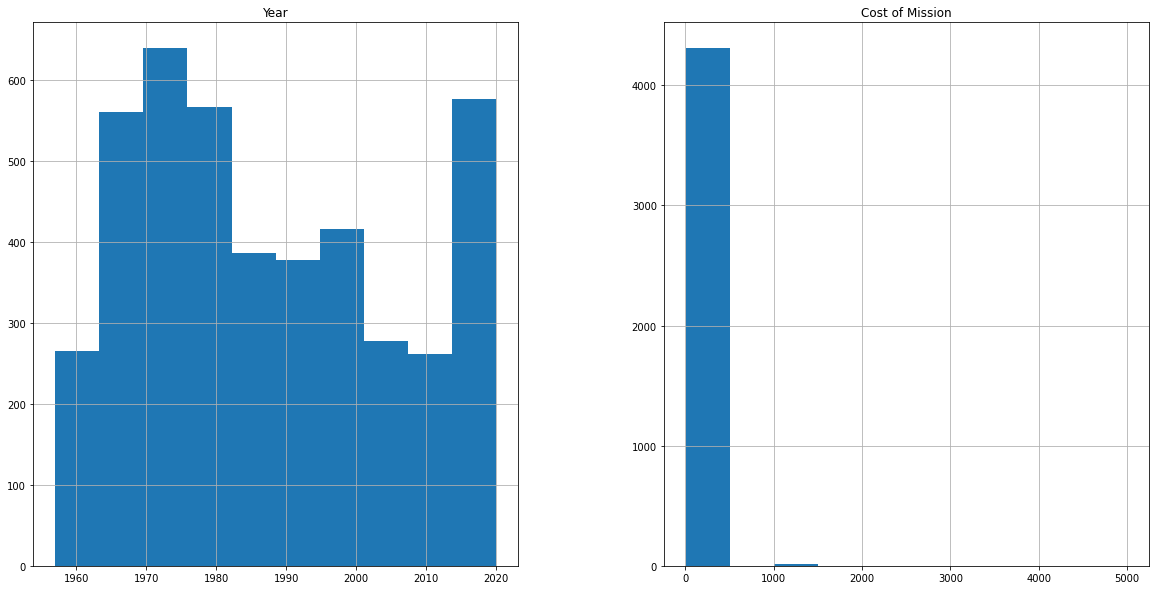

In [32]:
df.hist(figsize=(20,10));
plt.show;

**How many launches from each country**

In [33]:
df_country=df['Country'].value_counts().rename_axis("country").reset_index(name="count")
df_country

,country,count
0,Russia,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,Multi National,36
8,Iran,14
9,New Zealand,13


In [34]:
df_country=df_country[df_country["count"]>30]

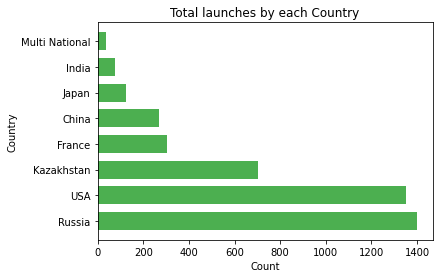

In [35]:
plt.barh(df_country["country"],df_country["count"],color = "#4CAF50",height=0.7)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title("Total launches by each Country")
plt.show()

**Total Money Spent by each Country**

In [36]:
df_country_cost=df[['Country','Cost of Mission']].groupby('Country').mean().reset_index("Country")
df_country_cost
#df_country_cost.info

,Country,Cost of Mission
0,Australia,148.759792
1,Brazil,148.759792
2,China,84.506086
3,France,155.864808
4,India,46.261028
5,Iran,148.759792
6,Israel,148.759792
7,Japan,130.903509
8,Kazakhstan,149.410733
9,Kenya,148.759792


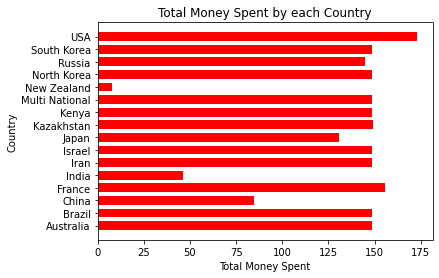

In [37]:
plt.barh(df_country_cost["Country"],df_country_cost["Cost of Mission"],color="#FF0000",height=0.7)
plt.xlabel("Total Money Spent")
plt.ylabel("Country")
plt.title("Total Money Spent by each Country")
plt.show()

**Total Money Spent by each Company**

In [38]:
df_company_cost=df[['Company','Cost of Mission']].groupby('Company').mean().reset_index("Company")
df_company_cost.head(10)

,Company,Cost of Mission
0,AEB,148.759792
1,AMBA,148.759792
2,ASI,148.759792
3,Arianespace,156.157857
4,Arme de l'Air,148.759792
5,Blue Origin,148.759792
6,Boeing,150.228038
7,CASC,80.378170
8,CASIC,148.759792
9,CECLES,148.759792


In [39]:
df_company_cost['Cost of Mission'] = df_company_cost['Cost of Mission'].astype(int)
df_company_cost=df_company_cost[df_company_cost["Cost of Mission"]!=148] 
#148 is not relevant as we have taken mean of all cost to fill the empty cells

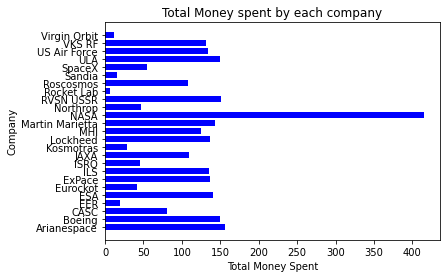

<Figure size 10800x3600 with 0 Axes>

In [40]:
plt.barh(df_company_cost["Company"],df_company_cost["Cost of Mission"],color="b",height=0.7)
plt.xlabel("Total Money Spent")
plt.ylabel("Company")
plt.title("Total Money spent by each company")
plt.figure(figsize=(150,50))
plt.show()

**Mission Status: Pie Chart**

In [41]:
df_mission=df['Mission Status'].value_counts().rename_axis("Mission Status").reset_index(name="count")
df_mission

,Mission Status,count
0,Success,3879
1,Failure,339
2,Partial Failure,102
3,Prelaunch Failure,4


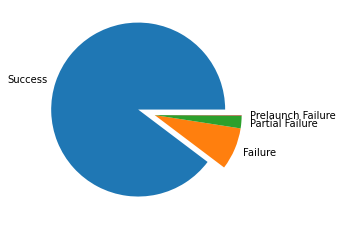

In [42]:
plt.pie(df_mission["count"],explode=[0.2,0,0,0],labels=df_mission["Mission Status"])
plt.show()

**Number of Missions through years**

In [43]:
df_year=df["Year"].value_counts().rename_axis("Year").reset_index(name="count")
df_year

,Year,count
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


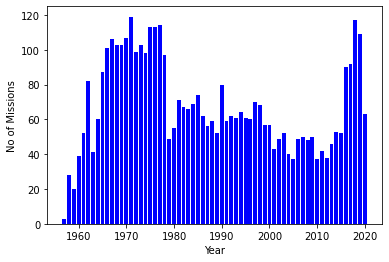

In [44]:
plt.bar(df_year["Year"],df_year["count"],color="b")
plt.xlabel("Year")
plt.ylabel("No of Missions")
plt.show()

**Mission Status of each Country**

In [45]:
df_country_status = df.groupby(['Country', 'Mission Status'])['Country'].count().unstack('Mission Status').fillna(0)
df_country_status


Mission Status,Failure,Partial Failure,Prelaunch Failure,Success
Country,,,,
Australia,3.0,0.0,0.0,3.0
Brazil,2.0,0.0,1.0,0.0
China,19.0,6.0,0.0,244.0
France,13.0,5.0,0.0,285.0
India,8.0,5.0,0.0,63.0
Iran,8.0,0.0,1.0,5.0
Israel,2.0,0.0,0.0,9.0
Japan,10.0,3.0,0.0,113.0
Kazakhstan,72.0,20.0,1.0,608.0


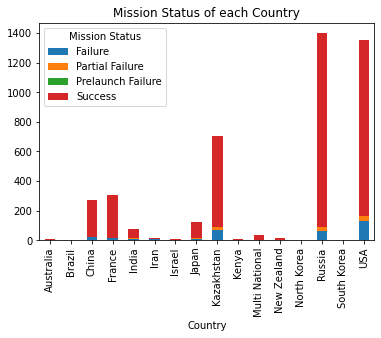

In [46]:
df_country_status.plot(kind='bar', stacked=True,
        title='Mission Status of each Country')
plt.show()

**Rocket Status of each Country**

<AxesSubplot:title={'center':'Rocket Status of each Country'}, xlabel='Country'>

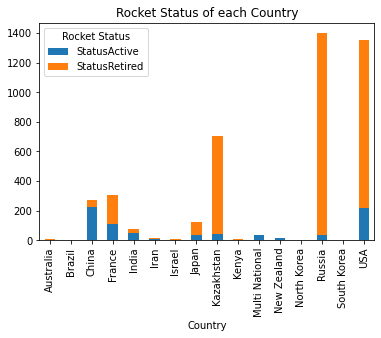

In [47]:
df_country_rocket=df.groupby(['Country','Rocket Status'])['Country'].count().unstack('Rocket Status').fillna(0)
df_country_rocket.plot(kind='bar',stacked=True,title="Rocket Status of each Country")